In [114]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [100]:
dataset_path = r"..\dataset\CroppedTrainDataAbove50Height"

In [101]:
img_path = dataset_path + r"\G0267326_object_1.JPG"
img_path

'..\\dataset\\CroppedTrainDataAbove50Height\\G0267326_object_1.JPG'

In [102]:
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [104]:
pothole_images = {}

for filename in os.listdir(dataset_path):
    img_path = os.path.join(dataset_path, filename)
    img = cv2.imread(img_path)

    if img is not None:
        pothole_images[filename] = img
    else :
        print(f"Error : Can't open image {filename}")

Text(0.5, 0.89, '100 Pothole Image Sample')

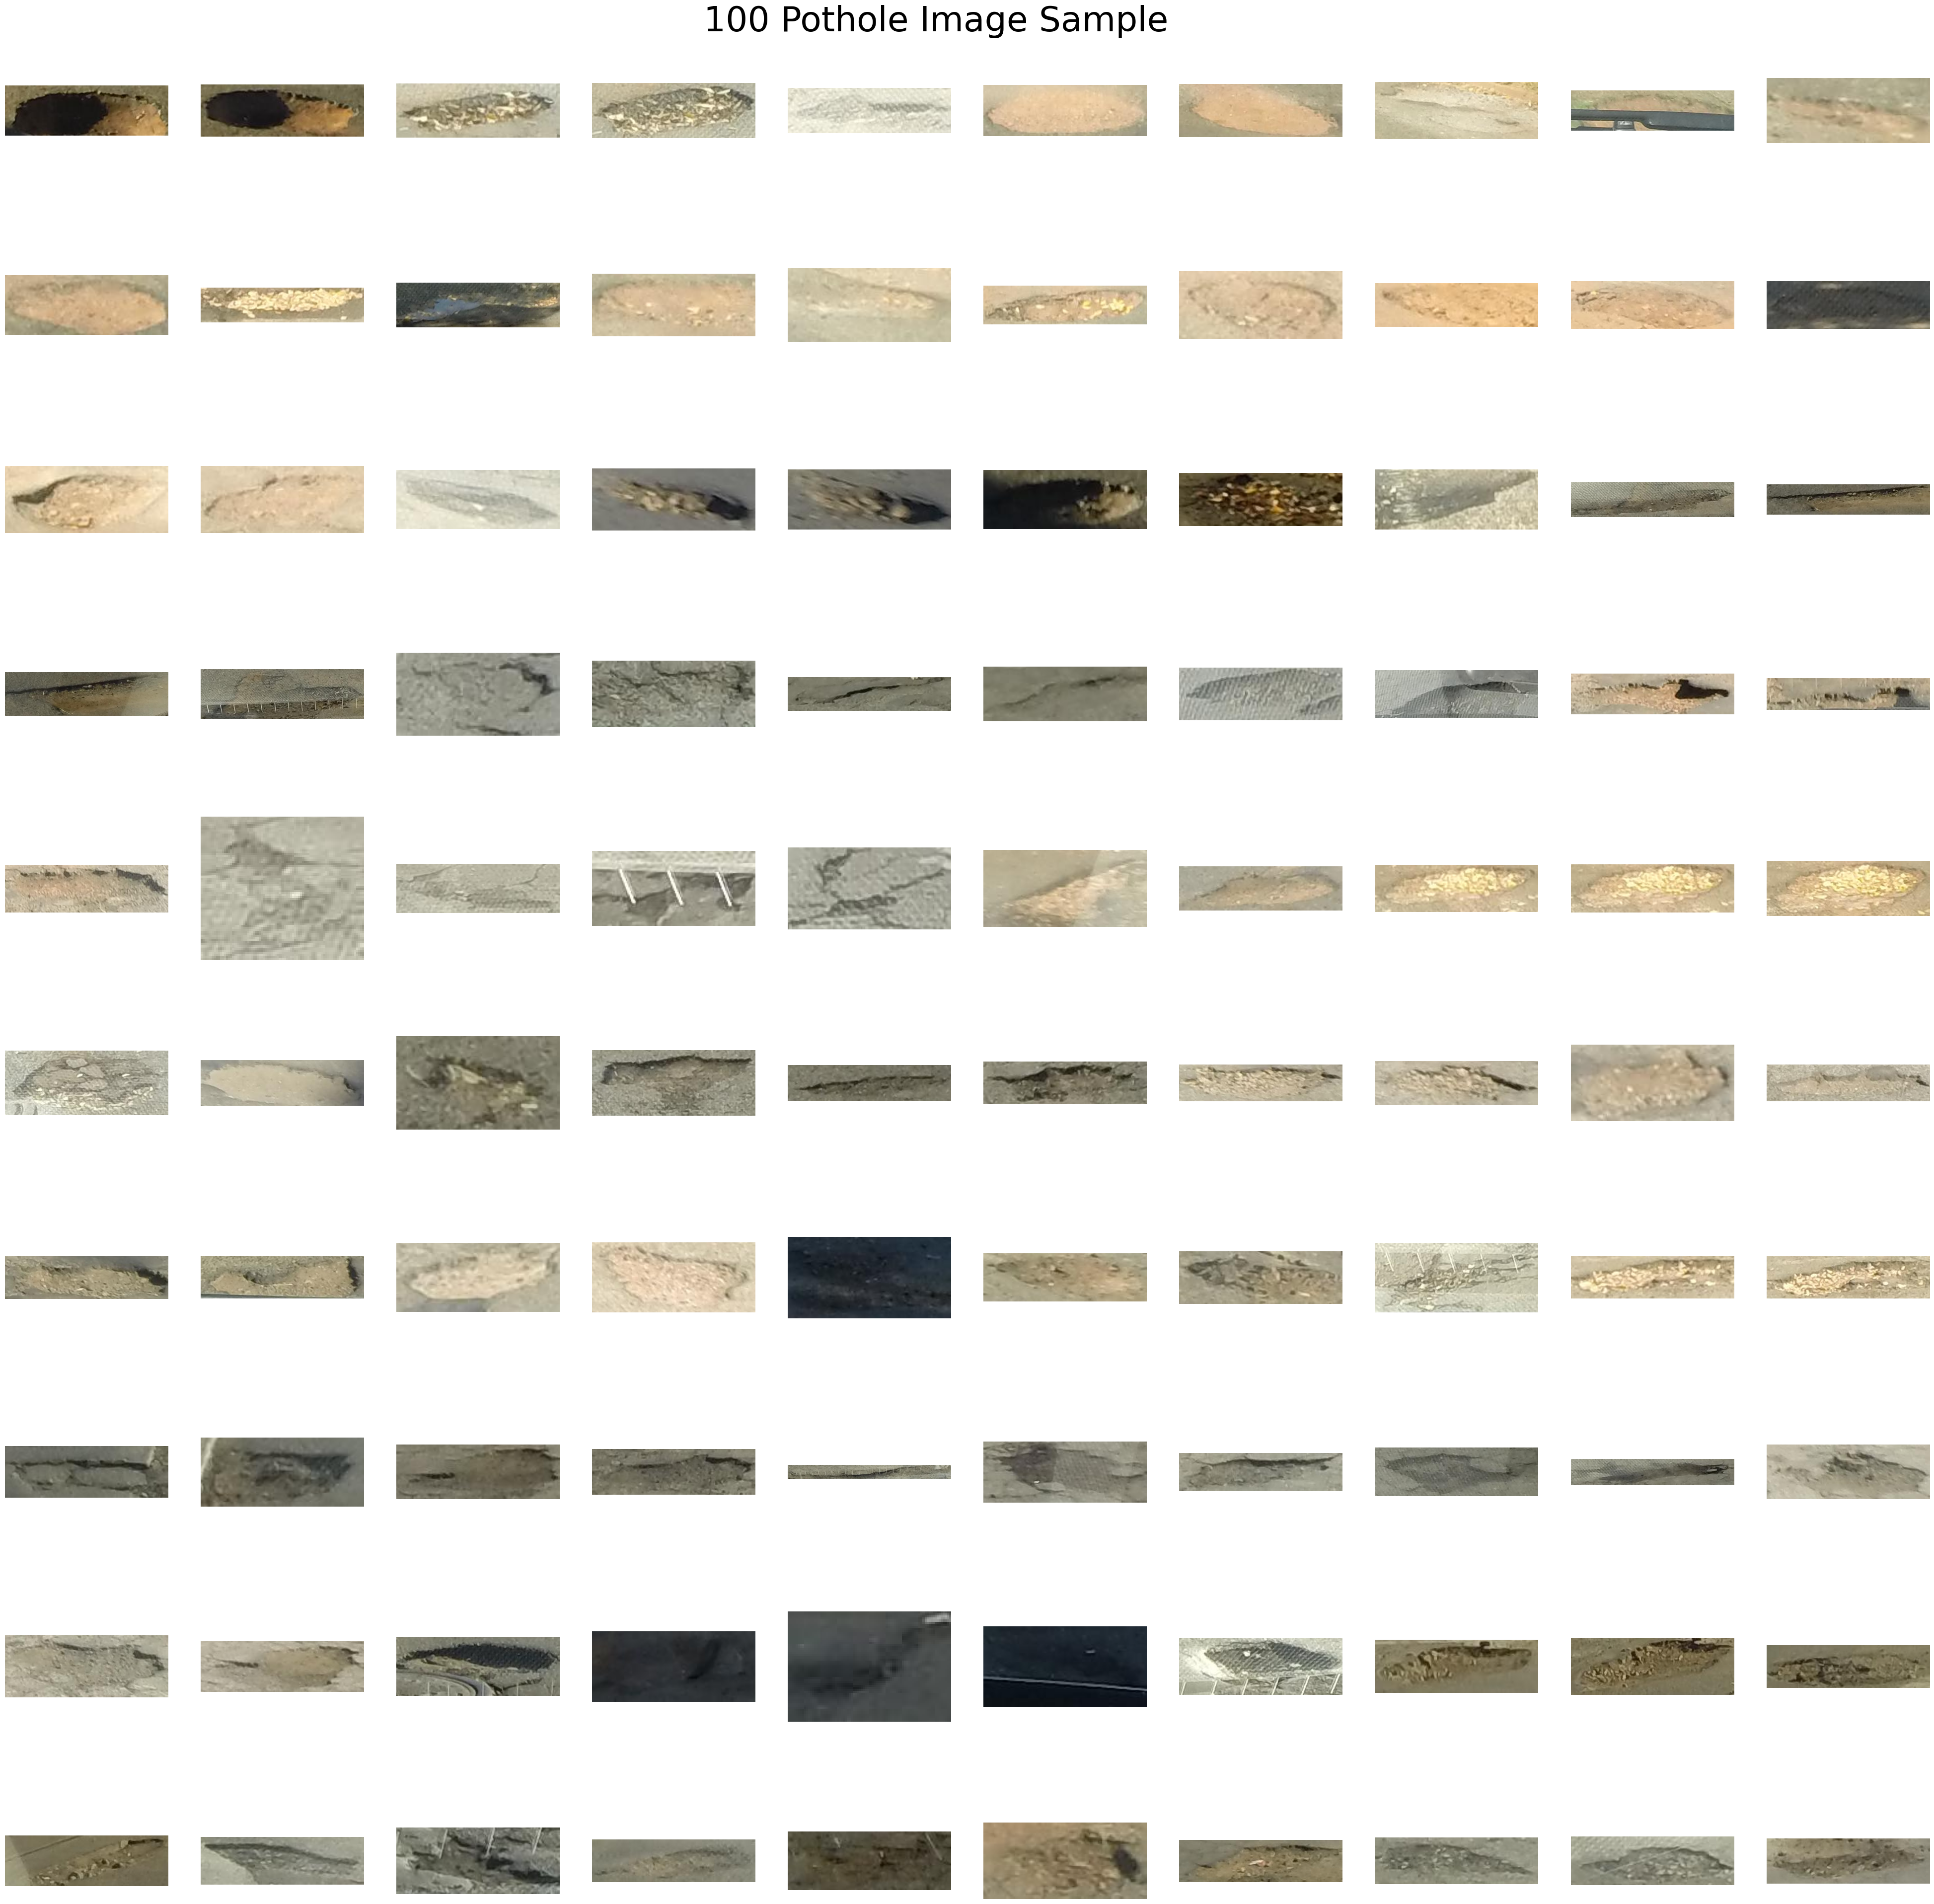

In [115]:
num_rows = 10
num_cols = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

for i, (filename, image) in enumerate(pothole_images.items()):

    if i < num_cols*num_rows:
        row_position = i // num_cols
        col_position = i % num_cols

        axes[row_position, col_position].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[row_position, col_position].axis('off')

plt.suptitle("100 Pothole Image Sample", fontsize=50, y=0.89)

In [ ]:
def get_average_image_size(images_dict):
    widths = []
    heights = []
    
    for i, (filename, image) in enumerate(images_dict.items()):
        if image is not None:
            h, w = image.shape[:2]
            widths.append(w)
            heights.append(h)
        else:
            print(f"Failed to read image: {filename}")
    
    if widths and heights:
        avg_width = int(np.mean(widths))
        avg_height = int(np.mean(heights))
    else:
        avg_width, avg_height = 0, 0
    
    return avg_width, avg_height

In [143]:
avg_width, avg_height = get_average_image_size(pothole_images)
target_size = (avg_width, avg_height)
print(avg_width, avg_height)

230 75


Text(0.5, 0.89, '100 Pothole Image Resized Sample')

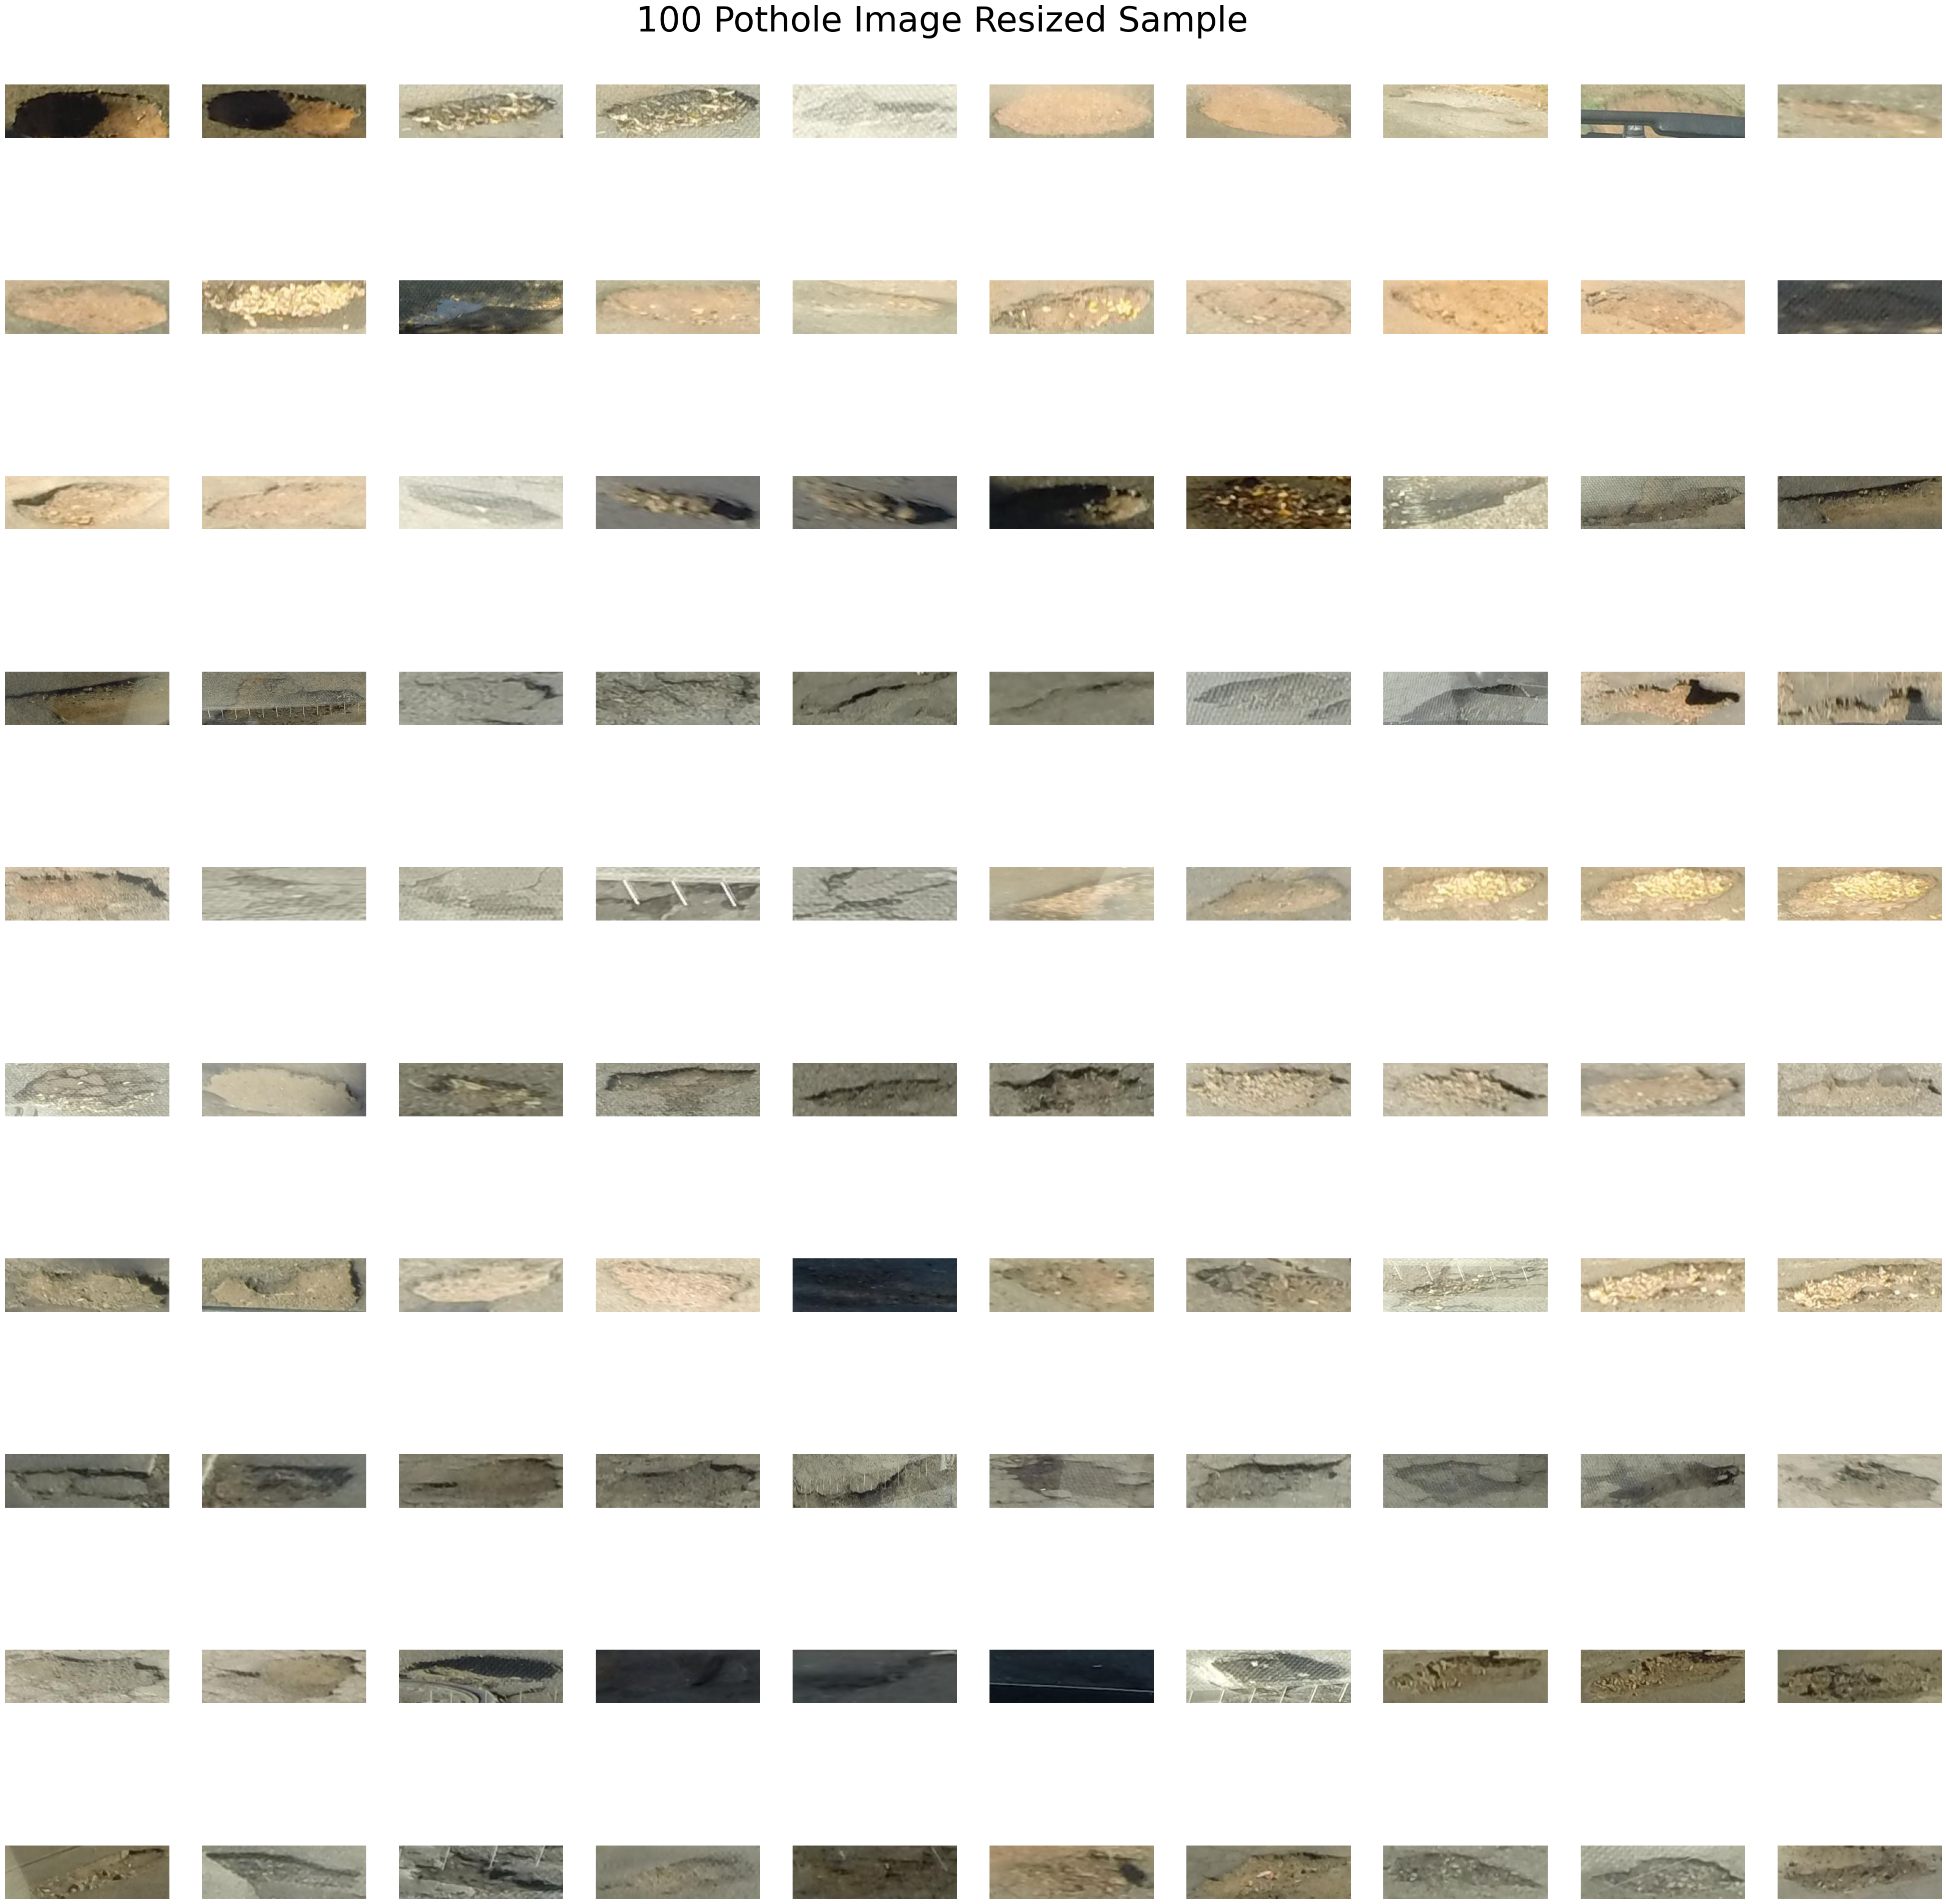

In [145]:
num_rows = 10
num_cols = 10

fig, axes = plt.subplots(num_rows, num_cols, figsize=(50, 50))

for i, (key, image) in enumerate(pothole_images.items()):

    img_resized = cv2.resize(image, target_size)

    if i < num_cols*num_rows:
        row_position = i // num_cols
        col_position = i % num_cols

        axes[row_position, col_position].imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))
        axes[row_position, col_position].axis('off')

plt.suptitle("100 Pothole Image Resized Sample", fontsize=50, y=0.89)